This notebook look at the count of Gaia observations in the IERS sample.

In [1]:
from astropy.table import Table
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import bottleneck as bn

%matplotlib inline
# %config InlineBackend.figure_format = "svg"


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
dr2_file = ("/Users/Neo/Astronomy/data/catalogs/"
            "gaia/dr2/gaiadr2_iers.fits")

gdr2 = Table.read(dr2_file)

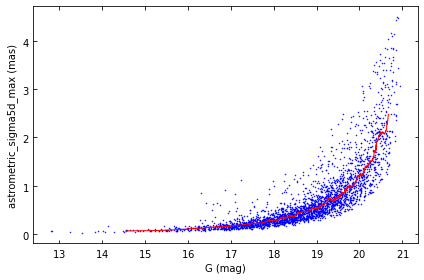

In [3]:
fig, ax = plt.subplots()

gdr2.sort("phot_g_mean_mag")
inter_size = 100
med_g = bn.move_median(gdr2["phot_g_mean_mag"], inter_size, min_count=25)
med_sigma = bn.move_median(gdr2["astrometric_sigma5d_max"], inter_size, min_count=25)

ax.plot(gdr2["phot_g_mean_mag"], gdr2["astrometric_sigma5d_max"], "b.", ms=1)
ax.plot(med_g, med_sigma, "r", lw=1)

ax.set_xlabel("G (mag)")
ax.set_ylabel("astrometric_sigma5d_max (mas)")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

plt.tight_layout()
plt.savefig("../plots/gcrf2-sigma-vs-G.eps", hbox="tight")

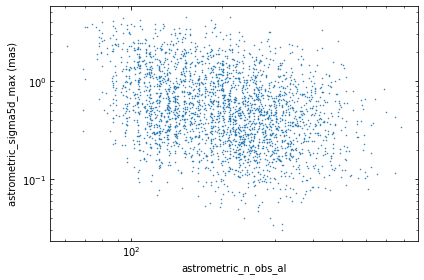

In [4]:
fig, ax = plt.subplots()

ax.plot(gdr2["astrometric_n_obs_al"], gdr2["astrometric_sigma5d_max"], ".", ms=1)

# gdr2.sort("astrometric_n_obs_al")
# inter_size = 200
# med_obs = bn.move_median(gdr2["astrometric_n_obs_al"], inter_size, min_count=25)
# med_sigma = bn.move_median(gdr2["astrometric_sigma5d_max"], inter_size, min_count=25)
# ax.plot(med_obs, med_sigma, "r", lw=1)

ax.set_xlabel("astrometric_n_obs_al")
ax.set_ylabel("astrometric_sigma5d_max (mas)")

ax.set_xscale("log")
ax.set_yscale("log")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

plt.tight_layout()
plt.savefig("../plots/gcrf2-sigma-vs-nobs.eps", hbox="tight")

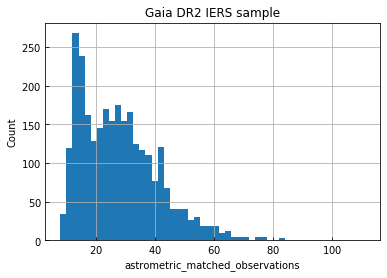

In [5]:
plt.hist(gdr2["matched_observations"], 50)
plt.xlabel("astrometric_matched_observations")
plt.ylabel("Count")
plt.title("Gaia DR2 IERS sample")
plt.grid()

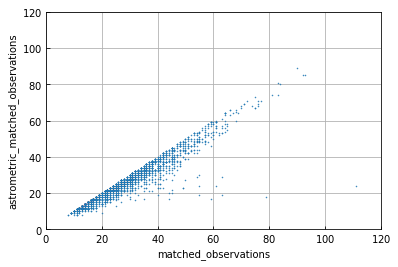

In [6]:
fig, ax = plt.subplots()

ax.plot(gdr2["matched_observations"], gdr2["astrometric_matched_observations"], ".", ms=1)
ax.set_xlabel("matched_observations")
ax.set_ylabel("astrometric_matched_observations")
ax.axis([0, 120, 0, 120])
ax.grid()

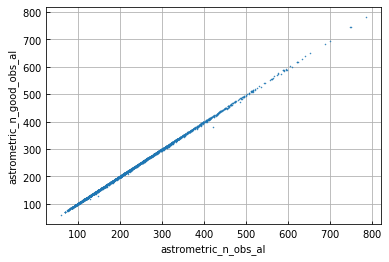

In [7]:
fig, ax = plt.subplots()

ax.plot(gdr2["astrometric_n_obs_al"], gdr2["astrometric_n_good_obs_al"], ".", ms=1)
ax.set_xlabel("astrometric_n_obs_al")
ax.set_ylabel("astrometric_n_good_obs_al")
ax.grid()

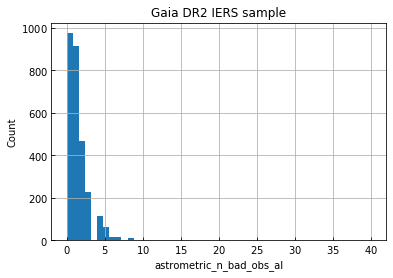

In [8]:
plt.hist(gdr2["astrometric_n_bad_obs_al"], 50)
plt.xlabel("astrometric_n_bad_obs_al")
plt.ylabel("Count")
plt.title("Gaia DR2 IERS sample")
plt.grid()

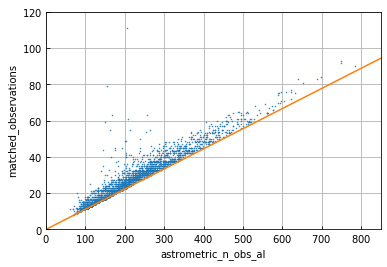

In [9]:
fig, ax = plt.subplots()

ax.plot(gdr2["astrometric_n_obs_al"], gdr2["matched_observations"], ".", ms=1)
ax.set_xlabel("astrometric_n_obs_al")
ax.set_ylabel("matched_observations")

x = np.arange(0, 850)
ax.plot(x, x/9)

ax.axis([0, 850, 0, 120])
ax.grid()

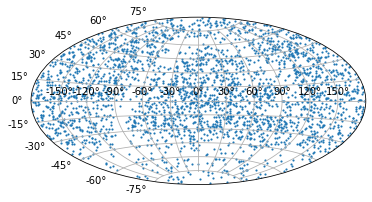

In [10]:
from astropy.coordinates import SkyCoord
# Low declination
coord = SkyCoord(ra=gdr2["ra"], dec=gdr2["dec"])
ra_rad = coord.ra.wrap_at(180 * u.deg).radian
dec_rad = coord.dec.radian

fig = plt.figure()

ax = plt.subplot(111, projection="aitoff")
ax.scatter(ra_rad, dec_rad, marker=".", s=5)
ax.grid()

In [11]:
mask1 = (gdr2["dec"] < -40)
mask2 = (gdr2["dec"] >= -40)
ldec = gdr2[mask1]
hdec = gdr2[mask2]

print("There are {:d} sources in region of decl.>=-40 deg "
      "and {:d} sources with decl.<-40 deg.".format(len(hdec), len(ldec)))

There are 2613 sources in region of decl.>=-40 deg and 207 sources with decl.<-40 deg.


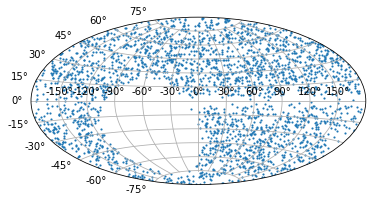

In [12]:
# High declination
coord1 = SkyCoord(ra=hdec["l"], dec=hdec["b"])
# The mid-point of skyplot will be 0
ra_rad1 = coord1.ra.wrap_at(180 * u.deg).radian
dec_rad1 = coord1.dec.radian

fig = plt.figure()

ax0 = plt.subplot(111, projection="aitoff")
ax0.scatter(ra_rad1, dec_rad1, marker=".", s=5)
ax0.grid()

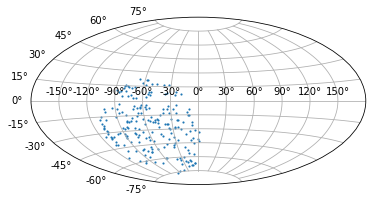

In [13]:
# Low declination
coord2 = SkyCoord(ra=ldec["l"], dec=ldec["b"])
# The mid-point of skyplot will be 0
ra_rad2 = coord2.ra.wrap_at(180 * u.deg).radian
dec_rad2 = coord2.dec.radian

fig = plt.figure()

ax0 = plt.subplot(111, projection="aitoff")
ax0.scatter(ra_rad2, dec_rad2, marker=".", s=5)
ax0.grid()